In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline


In [2]:
census = gpd.read_file('./data/census/california_census_tracts.geojson')

In [3]:
def get_census_tract(geo_id):
    census_tract = int(str(geo_id)[-10:])
    return census_tract
# census['census_tract'] = census['GEO_ID'].apply(lambda x: )

print(get_census_tract('1400000US06001425103'))
census['census_tract'] = census['GEO_ID'].apply(lambda x: get_census_tract(x))


6001425103


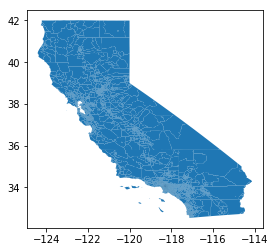

In [4]:
census.plot()

# Merge with other datasets

In [5]:
census.to_file('./data/processed/ca_counties.geojson', driver='GeoJSON')

In [8]:
dac_meta = pd.ExcelFile("./data/dac/SB-535-List-of-DACs_CES30.xlsx")
dac_all = dac_meta.parse('SB535 All Data')
ces3_master = pd.ExcelFile('./data/dac/ces3results.xlsx')
ces3_final = ces3_master.parse('CES3.0FINAL_results')

In [10]:
dac_all.columns = map(str.lower, dac_all.columns)
dac_all.columns = [ x.replace(' ', "_") for x in dac_all.columns ]
ces3_final.columns = map(str.lower, ces3_final.columns)
ces3_final.columns = [ x.replace(' ', "_") for x in ces3_final.columns ]

sunroof = gpd.read_file('./data/sunroof/project_sunroof_census_tract.geojson')

In [11]:
sunroof.head()

,census_tract_id,state_name,lat_max,lat_min,lng_max,lng_min,lat_avg,lng_avg,yearly_sunlight_kwh_kw_threshold_avg,count_qualified,...,yearly_sunlight_kwh_s,yearly_sunlight_kwh_e,yearly_sunlight_kwh_w,yearly_sunlight_kwh_f,yearly_sunlight_kwh_median,yearly_sunlight_kwh_total,install_size_kw_buckets_json,carbon_offset_metric_tons,existing_installs_count,geometry
0,2147483647,California,37.885250,37.849960,-122.212379,-122.246674,37.867596,-122.231903,1229.863862,956,...,4.026820e+06,3.204068e+06,4.198309e+06,4.929083e+06,11882.030884,1.754223e+07,"[ [ 0, 232 ], [ 5, 323 ], [ 10, 183 ], [ 15, 6...",4782.555768,143,POINT (-122.2319030761719 37.86759567260742)
1,2147483647,California,37.852020,37.842609,-122.241913,-122.257919,37.848171,-122.249580,1229.950000,528,...,1.794958e+06,6.560447e+05,1.462736e+06,2.530189e+06,8199.931738,6.837210e+06,"[ [ 0, 210 ], [ 5, 229 ], [ 10, 53 ], [ 15, 14...",1864.035459,38,POINT (-122.2495803833008 37.84817123413085)
2,2147483647,California,37.848511,37.834541,-122.243721,-122.265633,37.840599,-122.254440,1229.950000,1356,...,5.787867e+06,2.731708e+06,3.014379e+06,4.026218e+06,9160.206787,1.696480e+07,"[ [ 0, 435 ], [ 5, 607 ], [ 10, 210 ], [ 15, 4...",4625.130625,51,POINT (-122.2544403076172 37.84059906005859)
3,2147483647,California,37.853580,37.841351,-122.252350,-122.261864,37.848209,-122.257462,1229.950000,916,...,3.170661e+06,1.618531e+06,3.012013e+06,2.735362e+06,9054.664014,1.094153e+07,"[ [ 0, 316 ], [ 5, 380 ], [ 10, 138 ], [ 15, 4...",2983.001544,47,POINT (-122.2574615478516 37.84820938110352)
4,2147483647,California,37.852741,37.844139,-122.260231,-122.269691,37.848518,-122.264740,1229.950000,826,...,2.140234e+06,1.487672e+06,3.275423e+06,2.443032e+06,9092.423022,9.716222e+06,"[ [ 0, 272 ], [ 5, 361 ], [ 10, 128 ], [ 15, 2...",2648.943473,31,POINT (-122.2647399902344 37.84851837158203)


## census_dac

In [12]:
census_dac = census.merge(dac_all, on='census_tract', how='outer')

dac_keep = ['geometry',
            'census_tract', 'total_population', 'poverty', 
            'poverty_pctl', 'unemployment_pctl', 'housing_burden',
            'housing_burden_pctl', 'pop._char._score', 'pop._char._pctl']




census_dac = census_dac[dac_keep]

In [13]:
census_dac.head()

,geometry,census_tract,total_population,poverty,poverty_pctl,unemployment_pctl,housing_burden,housing_burden_pctl,pop._char._score,pop._char._pctl
0,"POLYGON ((-122.292355 37.849359, -122.289561 3...",6001425103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"POLYGON ((-122.278597 37.828544, -122.278057 3...",6001425104,3175.0,25.1,36.379635,56.111182,21.8,66.209698,6.366229,67.360323
2,"POLYGON ((-122.228079 37.833026, -122.224486 3...",6001426100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"POLYGON ((-122.229935 37.760063, -122.229686 3...",6001427100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"POLYGON ((-122.263533 37.769242, -122.263596 3...",6001427800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
## census_dac_ces

census_dac['disadvantaged'] = census_dac['poverty'].apply(lambda x: 0 if np.isnan(x) else 1)


## census_dac_ces

In [15]:
census_dac_ces = census_dac.merge(ces3_final, on='census_tract', how='outer')


In [16]:
census_dac_ces['no_ces'] = census_dac_ces['ces_3.0_score'].apply(lambda x: 1 if np.isnan(x) else 0)


In [17]:
census_dac_ces.head()

,geometry,census_tract,total_population_x,poverty_x,poverty_pctl_x,unemployment_pctl_x,housing_burden_x,housing_burden_pctl_x,pop._char._score_x,pop._char._pctl_x,...,poverty_y,poverty_pctl_y,unemployment,unemployment_pctl_y,housing_burden_y,housing_burden_pctl_y,pop._char._,pop._char._score_y,pop._char._pctl_y,no_ces
0,"POLYGON ((-122.292355 37.849359, -122.289561 3...",6001425103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16.6,19.459459,4.3,8.059398,14.9,34.691546,42.305777,4.387406,38.050195,0
1,"POLYGON ((-122.278597 37.828544, -122.278057 3...",6001425104,3175.0,25.1,36.379635,56.111182,21.8,66.209698,6.366229,67.360323,...,25.1,36.379635,10.0,56.111182,21.8,66.209698,61.387432,6.366229,67.360323,0
2,"POLYGON ((-122.228079 37.833026, -122.224486 3...",6001426100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.5,3.431804,4.2,7.500952,4.7,1.320132,7.760399,0.804762,0.605373,0
3,"POLYGON ((-122.229935 37.760063, -122.229686 3...",6001427100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.5,6.109365,1.9,0.875746,4.4,1.028180,28.088111,2.912907,17.543196,0
4,"POLYGON ((-122.263533 37.769242, -122.263596 3...",6001427800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,18.9,24.399749,5.1,13.478868,13.6,28.611323,39.775029,4.124925,34.052213,0


In [18]:
keep_census_dac_ces = """geometry census_tract total_population_x
poverty_pctl_x unemployment_pctl_x housing_burden_pctl_x _pctl_x
disadvantaged california_county zip city longitude latitude _ces_3.0_percentile
ozone_pctl pm2.5_pctl diesel_pm_pctl drinking_water_pctl pesticides_pctl 
tox._release_pctl traffic_pctl cleanup_sites_pctl groundwater_threats_pctl
haz._waste_pctl imp._water_bodies_pctl solid_waste_pctl pollution_burden_score
pollution_burden_pctl asthma_pctl low_birth_weight_pctl cardiovascular_disease_pctl
education_pctl linguistic_isolation_pctl poverty_pctl_y unemployment_pctl_y
housing_burden_pctl_y pop._char._pctl_y no_ces
"""

# Geomerge Sunroof

In [19]:
census_dac_ces

,geometry,census_tract,total_population_x,poverty_x,poverty_pctl_x,unemployment_pctl_x,housing_burden_x,housing_burden_pctl_x,pop._char._score_x,pop._char._pctl_x,...,poverty_y,poverty_pctl_y,unemployment,unemployment_pctl_y,housing_burden_y,housing_burden_pctl_y,pop._char._,pop._char._score_y,pop._char._pctl_y,no_ces
0,"POLYGON ((-122.292355 37.849359, -122.289561 3...",6001425103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16.6,19.459459,4.3,8.059398,14.9,34.691546,42.305777,4.387406,38.050195,0
1,"POLYGON ((-122.278597 37.828544, -122.278057 3...",6001425104,3175.0,25.1,36.379635,56.111182,21.8,66.209698,6.366229,67.360323,...,25.1,36.379635,10.0,56.111182,21.8,66.209698,61.387432,6.366229,67.360323,0
2,"POLYGON ((-122.228079 37.833026, -122.224486 3...",6001426100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.5,3.431804,4.2,7.500952,4.7,1.320132,7.760399,0.804762,0.605373,0
3,"POLYGON ((-122.229935 37.760063, -122.229686 3...",6001427100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.5,6.109365,1.9,0.875746,4.4,1.028180,28.088111,2.912907,17.543196,0
4,"POLYGON ((-122.263533 37.769242, -122.263596 3...",6001427800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,18.9,24.399749,5.1,13.478868,13.6,28.611323,39.775029,4.124925,34.052213,0
5,"POLYGON ((-122.252078 37.737918, -122.25711085...",6001428302,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.6,1.533627,4.9,11.752761,10.7,15.448083,25.703455,2.665567,14.730735,0
6,"POLYGON ((-122.09024 37.721378, -122.093532 37...",6001430300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20.0,26.649906,4.2,7.500952,8.9,9.139375,35.764518,3.709062,28.187666,0
7,"POLYGON ((-122.077953 37.710007, -122.074034 3...",6001430700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13.1,12.432432,6.1,21.284427,13.3,27.265804,40.043191,4.152718,34.518855,0
8,"POLYGON ((-122.058884 37.692192, -122.058769 3...",6001431100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,31.9,47.856694,11.2,64.729027,26.5,80.591521,54.584628,5.660818,56.715853,0
9,"POLYGON ((-122.164245 37.722651, -122.159808 3...",6001432501,4839.0,32.3,48.409805,37.669755,21.7,65.917746,6.743513,72.682558,...,32.3,48.409805,7.9,37.669755,21.7,65.917746,65.025047,6.743513,72.682558,0


In [23]:
# census_dac_ces.to_geo('./data/processed/census_dac_ces.geojson')


with open('./data/processed/census_dac_ces.geojson', 'w') as f:
    f.write(census_dac_ces.to_json())

In [26]:
import geopandas as gpd

In [28]:
census_sunroof = gpd.sjoin(census_dac_ces, sunroof, how="left", op='intersects')


In [30]:
with open('./data/processed/census_dac_ces_sunroof.geojson', 'w') as f:
    f.write(census_sunroof.to_json())

In [ ]:
!ls data/processed/census_dac_ces_sunroof_metrics.geojson

# Merge Energy Per Track

In [31]:
consumption = pd.read_excel('./data/consumption/consumption.xlsx')

In [33]:
consumption.head()

,Census Tract,CalEnviroScreen 3.0 Score,CalEnviroScreen 3.0 Percentile Range,Pollution Burden Percentile,Population Characteristics Percentile,Total Population,California County,Approximate Zip Code,Nearby City (to help approximate location only),Total Population by County,kwH consumed/person,kwH consumer/census tract
0,6019001100,94.0894,96-100% (highest scores),99.950218,99.697314,3174,Fresno,93706,Fresno,979915,7785.217439,2.471028e+07
1,6071001600,90.6778,96-100% (highest scores),100.000000,98.108210,6133,San Bernardino,91761,Ontario,2140096,7012.550463,4.300797e+07
2,6019000200,85.9688,96-100% (highest scores),99.004356,99.987388,3167,Fresno,93706,Fresno,979915,7785.217439,2.465578e+07
3,6077000801,82.491,96-100% (highest scores),99.576851,97.729852,6692,San Joaquin,95203,Stockton,733709,7437.265055,4.977018e+07
4,6019001500,82.0303,96-100% (highest scores),99.987554,92.773364,2206,Fresno,93725,Fresno,979915,7785.217439,1.717419e+07


In [38]:
keep = ['Census Tract', 'kwH consumed/person', 'kwH consumer/census tract', 'Total Population by County']
consumption_computed = consumption[keep]

consumption_computed.columns = ['census_tract', 'kwH_consumed/person', 'kwH_consumer/census tract', 'total_population_by_county']


consumption_computed.head()
        
        
        
        
        
        

,census_tract,kwH_consumed/person,kwH_consumer/census tract,total_population_by_county
0,6019001100,7785.217439,2.471028e+07,979915
1,6071001600,7012.550463,4.300797e+07,2140096
2,6019000200,7785.217439,2.465578e+07,979915
3,6077000801,7437.265055,4.977018e+07,733709
4,6019001500,7785.217439,1.717419e+07,979915


In [39]:
census_sunroof_metrics = census_sunroof.merge(consumption_computed, on='census_tract', how='outer')

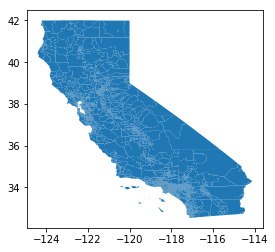

In [44]:
census_sunroof_metrics.plot()

In [45]:
with open('./data/processed/census_dac_ces_sunroof_metrics.geojson', 'w') as f:
    f.write(census_sunroof_metrics.to_json())

In [47]:
census_sunroof_metrics.head()

,geometry,census_tract,total_population_x,poverty_x,poverty_pctl_x,unemployment_pctl_x,housing_burden_x,housing_burden_pctl_x,pop._char._score_x,pop._char._pctl_x,...,yearly_sunlight_kwh_w,yearly_sunlight_kwh_f,yearly_sunlight_kwh_median,yearly_sunlight_kwh_total,install_size_kw_buckets_json,carbon_offset_metric_tons,existing_installs_count,kwH_consumed/person,kwH_consumer/census tract,total_population_by_county
0,"POLYGON ((-122.292355 37.849359, -122.289561 3...",6001425103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.713352e+06,1.907637e+07,14299.256982,2.773434e+07,"[ [ 0, 79 ], [ 5, 101 ], [ 10, 30 ], [ 15, 23 ...",7561.241591,3.0,NaN,NaN,NaN
1,"POLYGON ((-122.278597 37.828544, -122.278057 3...",6001425104,3175.0,25.1,36.379635,56.111182,21.8,66.209698,6.366229,67.360323,...,2.604776e+06,2.130434e+07,11045.242822,3.079257e+07,"[ [ 0, 125 ], [ 5, 138 ], [ 10, 54 ], [ 15, 22...",8395.009596,11.0,6563.721745,2.083982e+07,1647704.0
2,"POLYGON ((-122.228079 37.833026, -122.224486 3...",6001426100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.166837e+06,5.335144e+06,10703.852960,2.668762e+07,"[ [ 0, 502 ], [ 5, 656 ], [ 10, 303 ], [ 15, 1...",7275.873417,201.0,NaN,NaN,NaN
3,"POLYGON ((-122.229935 37.760063, -122.229686 3...",6001427100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.939659e+06,6.245457e+06,8052.357440,1.580332e+07,"[ [ 0, 449 ], [ 5, 457 ], [ 10, 138 ], [ 15, 3...",4308.476074,22.0,NaN,NaN,NaN
4,"POLYGON ((-122.263533 37.769242, -122.263596 3...",6001427800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.007227e+06,4.206807e+06,9067.520782,1.253077e+07,"[ [ 0, 340 ], [ 5, 378 ], [ 10, 139 ], [ 15, 4...",3416.276281,26.0,NaN,NaN,NaN


In [52]:
census_sunroof_metrics['yearly_sunlight_kwh_total'].iloc[0]

27734340.37359618

In [10]:

def excess_solar(df_row):
    kwh_total = df_row['yearly_sunlight_kwh_total']
#     print(kwh_total)

    difference = df_row['yearly_sunlight_kwh_total'] - df_row['kwH_consumer/census tract']
    return difference

In [14]:
from tqdm import tqdm

excess_solar = []
for idx, row in tqdm(census_sunroof_metrics.iterrows()):
    excess = row['yearly_sunlight_kwh_total'] - row['kwH_consumer/census tract']
    excess_solar.append(excess)

8107it [00:00, 12714.13it/s]


In [16]:
census_sunroof_metrics['excess_solar'] = excess_solar

In [18]:
with open('./data/processed/census_dac_ces_sunroof_metrics.geojson', 'w') as f:
    f.write(census_sunroof_metrics.to_json())

In [ ]:
census_sunroof_metrics.columns

In [1]:
import geopandas as gpd
census_sunroof_metrics = gpd.read_file('./data/processed/census_dac_ces_sunroof_metrics.geojson')

In [19]:
census_sunroof_metrics['kw_total']

0.0

In [2]:
census_sunroof_metrics.kwwa

,id,census_tract,total_population_x,poverty_x,poverty_pctl_x,unemployment_pctl_x,housing_burden_x,housing_burden_pctl_x,pop._char._score_x,pop._char._pctl_x,...,yearly_sunlight_kwh_f,yearly_sunlight_kwh_median,yearly_sunlight_kwh_total,install_size_kw_buckets_json,carbon_offset_metric_tons,existing_installs_count,kwH_consumed/person,kwH_consumer/census tract,total_population_by_county,geometry
0,0,6001425103,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,1.907637e+07,14299.256982,2.773434e+07,"[ [ 0, 79 ], [ 5, 101 ], [ 10, 30 ], [ 15, 23 ...",7561.241591,3.0,0.000000,0.000000e+00,0.0,"POLYGON ((-122.292355 37.849359, -122.289561 3..."
1,1,6001425104,3175.0,25.1,36.379635,56.111182,21.8,66.209698,6.366229,67.360323,...,2.130434e+07,11045.242822,3.079257e+07,"[ [ 0, 125 ], [ 5, 138 ], [ 10, 54 ], [ 15, 22...",8395.009596,11.0,6563.721745,2.083982e+07,1647704.0,"POLYGON ((-122.278597 37.828544, -122.278057 3..."
2,2,6001426100,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,5.335144e+06,10703.852960,2.668762e+07,"[ [ 0, 502 ], [ 5, 656 ], [ 10, 303 ], [ 15, 1...",7275.873417,201.0,0.000000,0.000000e+00,0.0,"POLYGON ((-122.228079 37.833026, -122.224486 3..."
3,3,6001427100,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,6.245457e+06,8052.357440,1.580332e+07,"[ [ 0, 449 ], [ 5, 457 ], [ 10, 138 ], [ 15, 3...",4308.476074,22.0,0.000000,0.000000e+00,0.0,"POLYGON ((-122.229935 37.760063, -122.229686 3..."
4,4,6001427800,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,4.206807e+06,9067.520782,1.253077e+07,"[ [ 0, 340 ], [ 5, 378 ], [ 10, 139 ], [ 15, 4...",3416.276281,26.0,0.000000,0.000000e+00,0.0,"POLYGON ((-122.263533 37.769242, -122.263596 3..."


In [21]:
list(census_sunroof_metrics.columns)

['id',
 'census_tract',
 'total_population_x',
 'poverty_x',
 'poverty_pctl_x',
 'unemployment_pctl_x',
 'housing_burden_x',
 'housing_burden_pctl_x',
 'pop._char._score_x',
 'pop._char._pctl_x',
 'disadvantaged',
 'total_population_y',
 'california_county',
 'zip',
 'city',
 'longitude',
 'latitude',
 'ces_3.0_score',
 '_ces_3.0_percentile',
 'ces_3.0_\npercentile_range',
 'ozone',
 'ozone_pctl',
 'pm2.5',
 'pm2.5_pctl',
 'diesel_pm',
 'diesel_pm_pctl',
 'drinking_water',
 'drinking_water_pctl',
 'pesticides',
 'pesticides_pctl',
 'tox._release',
 'tox._release_pctl',
 'traffic',
 'traffic_pctl',
 'cleanup_sites',
 'cleanup_sites_pctl',
 'groundwater_threats',
 'groundwater_threats_pctl',
 'haz._waste',
 'haz._waste_pctl',
 'imp._water_bodies',
 'imp._water_bodies_pctl',
 'solid_waste',
 'solid_waste_pctl',
 'pollution_burden',
 'pollution_burden_score',
 'pollution_burden_pctl',
 'asthma',
 'asthma_pctl',
 'low_birth_weight',
 'low_birth_weight_pctl',
 'cardiovascular_disease',
 'car

In [23]:
census_sunroof_metrics.iloc[0].T

id                                                                                      0
census_tract                                                                   6001425103
total_population_x                                                                      0
poverty_x                                                                               0
poverty_pctl_x                                                                          0
unemployment_pctl_x                                                                     0
housing_burden_x                                                                        0
housing_burden_pctl_x                                                                   0
pop._char._score_x                                                                      0
pop._char._pctl_x                                                                       0
disadvantaged                                                                           0
total_popu

In [26]:
keep_vars = ['census_tract', 'total_population', 'poverty', 'poverty_pctl', 'unemployment_pctl', 'housing_burden', 'housing_burden_pctl', 'pop._char._score', 'pop._char._pctl', 'kwH_consumed/person', 'kwH_consumer/census tract', 'total_population_by_county']



In [1]:
import geopandas as gpd

census_sunroof_metrics = gpd.read_file('./data/processed/census_dac_ces_sunroof_metrics.geojson')

In [2]:
report = census_sunroof_metrics.drop(['geometry', 'install_size_kw_buckets_json'], axis=1)

In [4]:
report.columns.unique()

Index(['id', 'census_tract', 'total_population_x', 'poverty_x',
       'poverty_pctl_x', 'unemployment_pctl_x', 'housing_burden_x',
       'housing_burden_pctl_x', 'pop._char._score_x', 'pop._char._pctl_x',
       ...
       'yearly_sunlight_kwh_w', 'yearly_sunlight_kwh_f',
       'yearly_sunlight_kwh_median', 'yearly_sunlight_kwh_total',
       'carbon_offset_metric_tons', 'existing_installs_count',
       'kwH_consumed/person', 'kwH_consumer/census tract',
       'total_population_by_county', 'excess_solar'],
      dtype='object', length=102)

In [3]:
report.head()

,id,census_tract,total_population_x,poverty_x,poverty_pctl_x,unemployment_pctl_x,housing_burden_x,housing_burden_pctl_x,pop._char._score_x,pop._char._pctl_x,...,yearly_sunlight_kwh_w,yearly_sunlight_kwh_f,yearly_sunlight_kwh_median,yearly_sunlight_kwh_total,carbon_offset_metric_tons,existing_installs_count,kwH_consumed/person,kwH_consumer/census tract,total_population_by_county,excess_solar
0,0,6001425103,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,2.713352e+06,1.907637e+07,14299.256982,2.773434e+07,7561.241591,3.0,0.000000,0.000000e+00,0.0,2.773434e+07
1,1,6001425104,3175.0,25.1,36.379635,56.111182,21.8,66.209698,6.366229,67.360323,...,2.604776e+06,2.130434e+07,11045.242822,3.079257e+07,8395.009596,11.0,6563.721745,2.083982e+07,1647704.0,9.952752e+06
2,2,6001426100,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,7.166837e+06,5.335144e+06,10703.852960,2.668762e+07,7275.873417,201.0,0.000000,0.000000e+00,0.0,2.668762e+07
3,3,6001427100,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,1.939659e+06,6.245457e+06,8052.357440,1.580332e+07,4308.476074,22.0,0.000000,0.000000e+00,0.0,1.580332e+07
4,4,6001427800,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,3.007227e+06,4.206807e+06,9067.520782,1.253077e+07,3416.276281,26.0,0.000000,0.000000e+00,0.0,1.253077e+07
